In [1]:
from sklearn.datasets import make_blobs

X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)

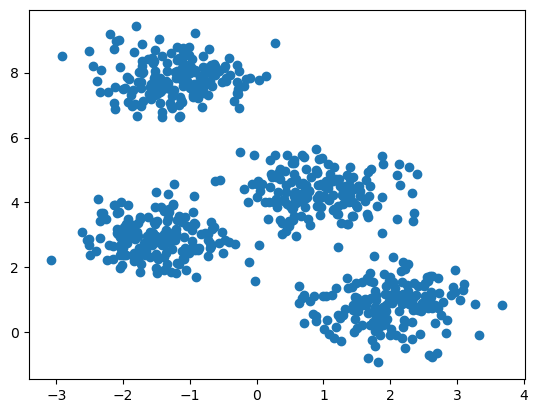

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0], y=X[:,1])
plt.show()